El siguiente código genera una señal (hipótesis) binaria compleja que permite modificar la probabilidad de ocurrencia de los valores binarios: 

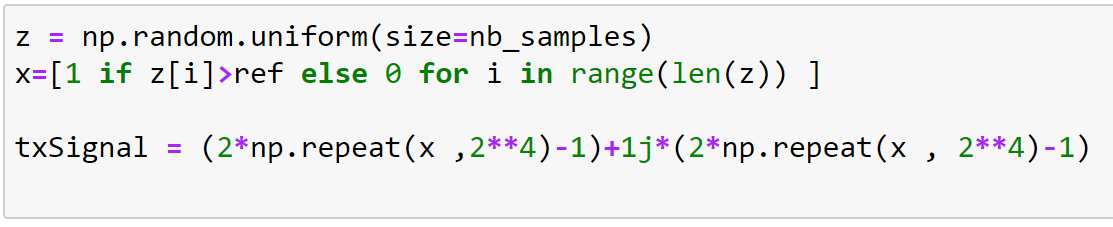

Inicialmente configure el valor de la variable ref a un valor de 0.5 .

1. Realizar  un gráfica temporal  y el histograma de cada una de las componentes de la señal. Realizar también una gráfica en frecuencia. Describa con sus propias palabras lo que observa de las gráficas.

Considerando la siguiente configuración del SDR:

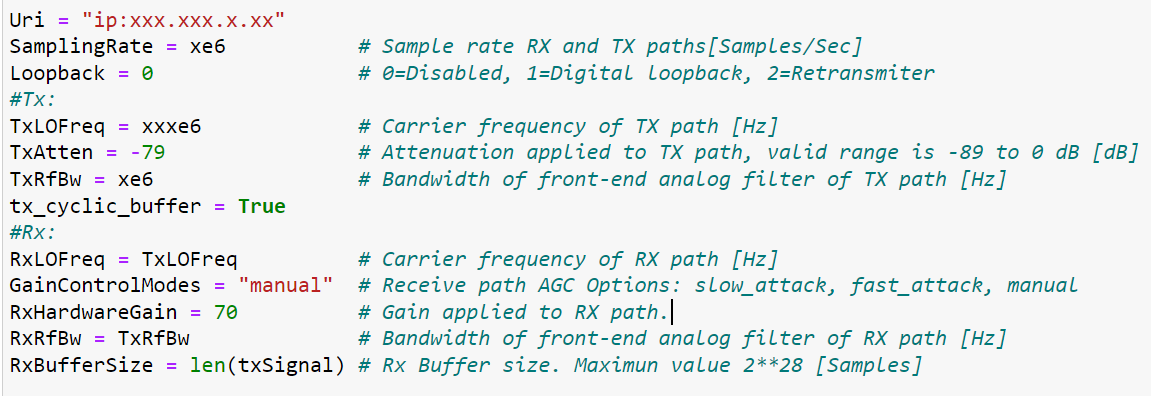

2. Realice una transmisión y recepción de la señal usando el SDR a través del medio inalámbrico. Normalice la señal recibida de forma tal que tenga potencia unitaria y realice una gráfica temporal y su correspondiente histograma tanto de la componente en fase como en cuadratura. Describa con sus propias palabras lo que observa de las gráficas. Tenga presente de realizar unas cuantas recepciones antes de obtener la recepción deseada cuando se usa el modo transmisión continua ("tx_cyclic_buffer = True"). Esto se hace para evitar capturar la señal en algún estado transitorio inicial y para eliminar del buffer del receptor muestras de señales tomadas con anterioridad. El siguiente código muestra el procedimiento descripto:  

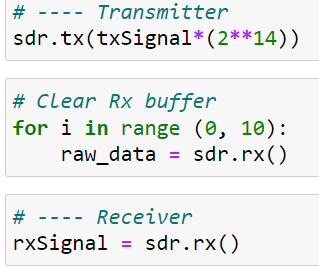

3. Repita los pasos anteriores pero ahora aumentando la potencia de la señal transmitida, esto es llevando el valor de la variable "TxAtten" al valor -70. Describa con sus propias palabras lo que observa en el histograma de la señal comparándola con lo anteriormente obtenido.

4. Configure el valor de la variable "ref" a un valor de 0.3 y repita los pasos anteriores. Que puede concluir del histograma obtenido de la señal recibida?. 


5. Modifique el código para enviar una hipotesis  $H \in \{ -1,-0.3333,+0.3333,+1\}$  con igual probabilidades. Muestre el histograma de la señal recibida por el SDR.  Describa con sus propias palabras lo que observa en la gráfica.

+ Tenga presente que si la cantidad de muestras de la señal a transmitir ha cambiado, debe eliminar el buffer Y volverlo a configurar para evitar errores de configuración. Las siguiente lineas de código muestra el procedimiento descripto:

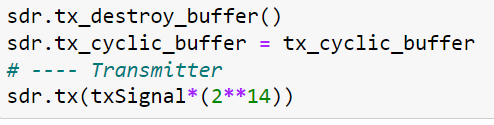

#### RESPUESTA: 
Señal a modo ilustrativo de lo que se espera recibir para el punto 2:

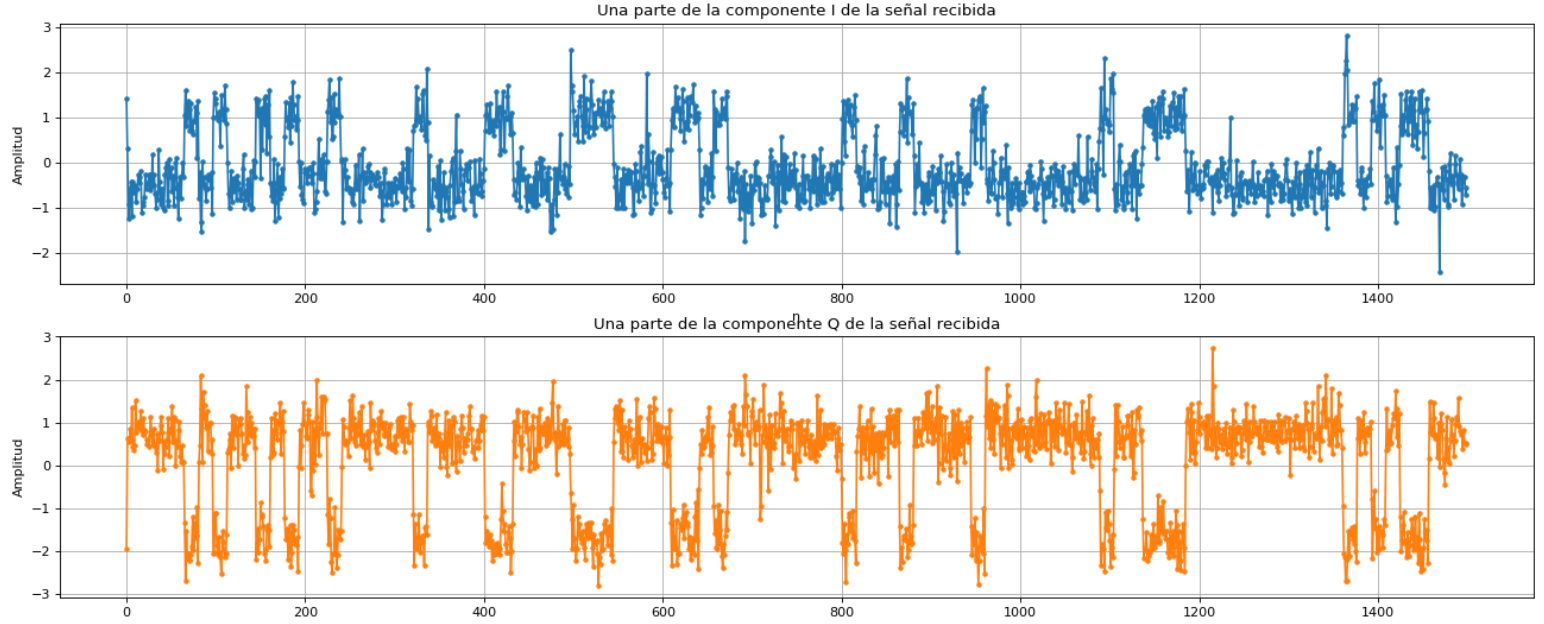

Señal a modo ilustrativo de lo que se espera recibir para el punto 5:

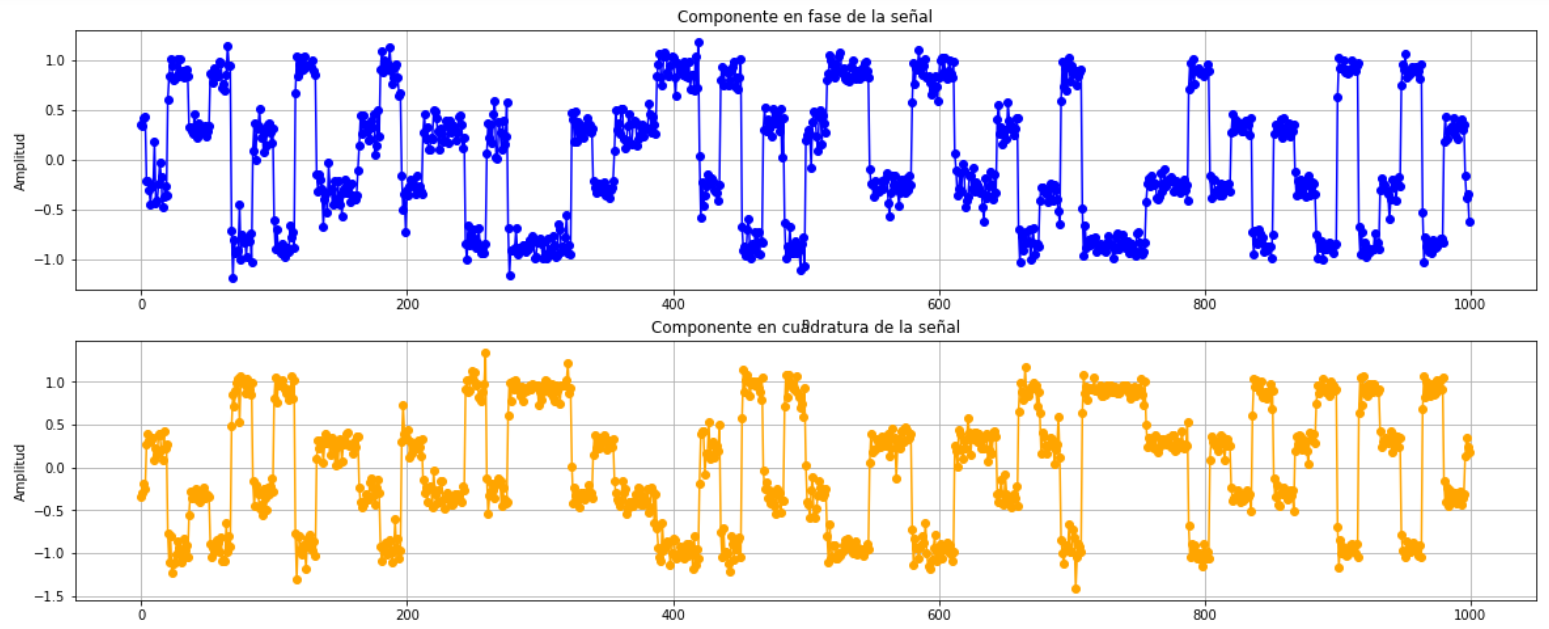

# Resultados
---
Configuración previa.
+ Inicialización de la Variable 'Ref'
+ Definición de funciones que crean la señal enviada Tx

In [1]:
import adi
import numpy as np
import matplotlib.pyplot as plt
Uri = "ip:192.168.1.31"
sdr  = adi.Pluto(Uri)

nSamples     = 2**20
samplingRate = 2.0e6
frec         = samplingRate/8

# Inicialización de Ref
Ref = 0.5

def creartxSignal(ref):
    z = np.random.uniform(size = nSamples)
    x = [1 if z[n] > ref else 0 for n in range(len(z))]
    return (2*np.repeat(x,2**4)-1)+1j*(2*np.repeat(x,2**4)-1)
txSignal = creartxSignal(Ref)


# sdr.rx_destroy_buffer()
# sdr.tx_destroy_buffer()

+ Definición de funciones que grafican de la señal enviada Tx

In [2]:
def plotSignal(signal):
#------------------------------- Transmitted I component ------------------------------- 
# Plot time domain
    plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(np.real(signal))
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.title('Componente en fase de la señal')
    plt.grid()
#------------------------------- Transmitted Q component -------------------------------
# Plot time domain
    plt.subplot(2,1,2)
    plt.plot(np.imag(signal))
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.title('Componente en cuadratura de la señal')
    plt.grid()
    plt.show()

+ Definición de la función de densidad espectral
+ Parametros de configuración del SDR
+ Envío de una señal, y recepción


In [3]:
def plotSpect(signal,samplingRate):
    plt.subplots(figsize=(15, 3))
    plt.grid()
    plt.title("Power Spectral Density")
    plt.psd(signal, len(signal), samplingRate, color='C1')
    plt.show()

#------------------------------- SDR Parameter Configuration -------------------------------

Uri              = Uri
Loopback         = 0             # 0=Disabled, 1=Digital loopback, 2=Retransmiter
SamplingRate     = samplingRate  # Sample rate RX and TX paths[Samples/Sec]

TxLOFreq         = 938e6         # Carrier frequency of TX path [Hz]
TxAtten          = -79          # Attenuation applied to TX path, valid range is -89 to 0 dB [dB]
TxRfBw           = 2.0e6         # Bandwidth of front-end analog filter of TX path [Hz]
RxBufferSize     = nSamples      # Depend on the length of the transmit signal. Maximum tx buffer size 2**24[samples]
tx_cyclic_buffer = True

RxLOFreq         = TxLOFreq      # Carrier frequency of RX path [Hz]
GainControlModes = "manual" # Receive path AGC Options: slow_attack, fast_attack, manual
RxHardwareGain   = 70          # Gain applied to RX path. Only applicable when gain_control_mode is set to 'manual'    
RxRfBw           = TxRfBw        # Bandwidth of front-end analog filter of RX path [Hz] 
RxBufferSize     = len(txSignal)      # Rx Buffer size. Maximun value 2**28 [Samples]

#------------------------------- Transmitter ------------------------------- 
sdr.tx(txSignal*(2**15-1)) # The PlutoSDR expects samples to be between -2^15-1 and +2^15-1, not -1 and +1 like some SDRs

#------------------------------- Receiver ------------------------------- 
rxSignal = sdr.rx()

In [4]:
#Funcion para graficar histogramas
def histograma(señal,cajas = 70,rango = (-.015,.015)):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.grid()
    plt.title("Parte Real")
    plt.hist(np.real(señal),density=True,bins=cajas,range=rango,rwidth=1)

    plt.subplot(1,2,2)
    plt.grid()
    plt.title("Parte Imaginaria")
    plt.hist(np.imag(señal),density=True,bins=cajas,range=rango,rwidth=1)

1. 
+ Gráfica Temporal de sus Componentes
+ Histograma de sus Componentes

    En la gráfica temporal puede verse cómo la señal (Tx) que se está enviando tiene una componente real y otra imaginaria, estas son idénticas. 

    Y en el histograma puede verse que los valores enviados, por cada componente, fueron sólo 1s y -1s


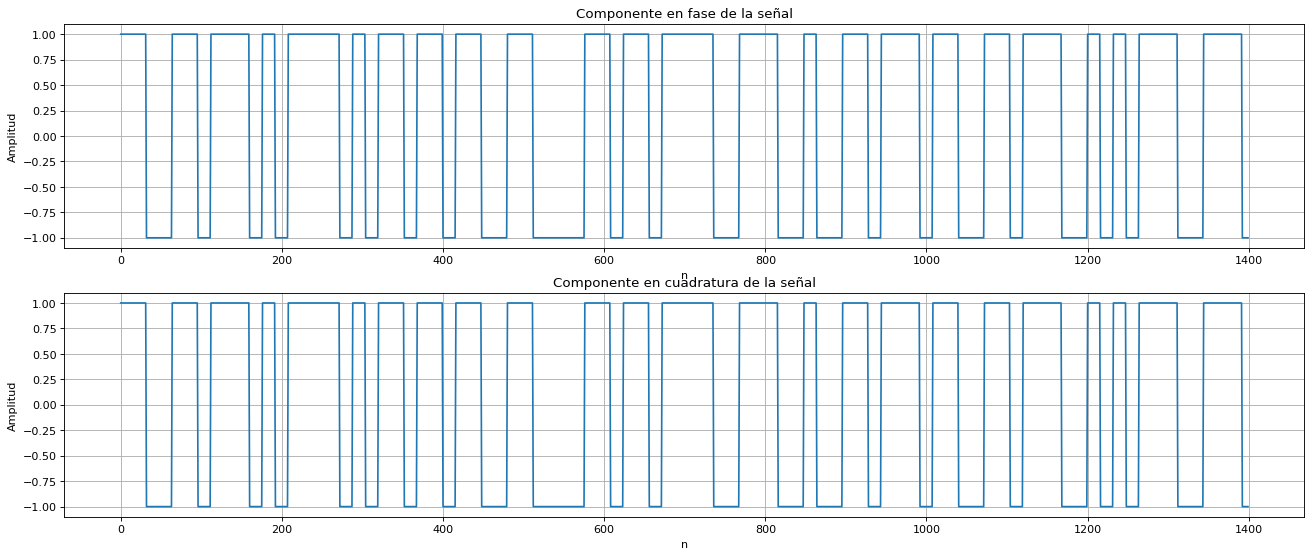

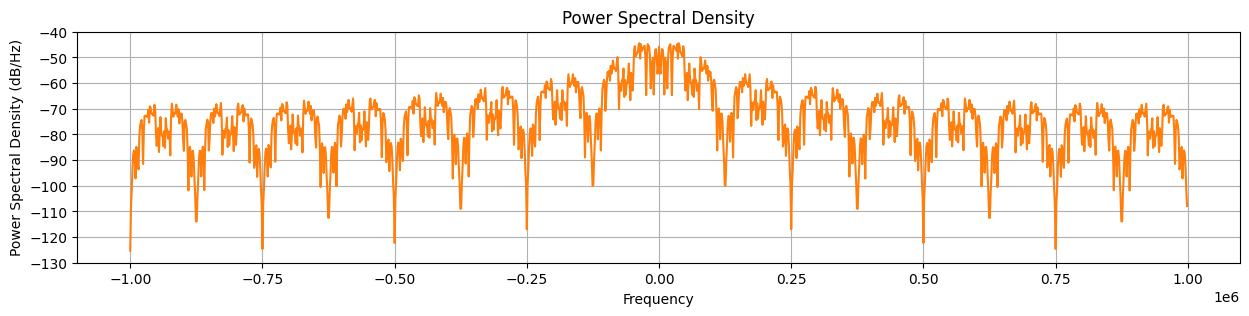

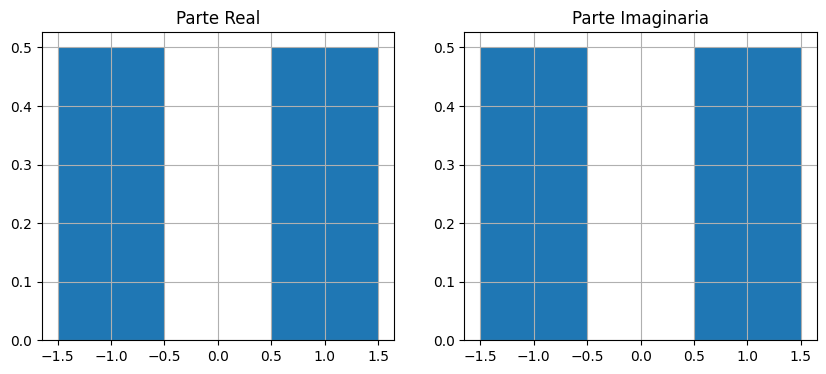

In [5]:
plotSignal(txSignal[0:1400])
plotSpect(txSignal[0:1400],samplingRate)

histograma(txSignal,cajas = 3,rango = (-1.5,1.5))

# plotSignal(rxSignal[0:1400])
plt.show()


2. 
+ Normalización de la Señal
+ Gráfica Temporal de sus Componentes
+ Histograma de sus Componentes

    En la gráfica temporal puede verse cómo la señal devuelta por el SDR está compuesta 1s y 0s lógicos como la señal TX, pero en este caso, puede verse claramente el ruido en forma de picos de sierra, a lo largo de la señal

    En el histograma puede verse que la probabilidad de ocurrencias de cada valor pico de la señal no es igual como en TX, probalemente debido al ruido

In [6]:
def cleanBuffer():
    sdr.tx(txSignal*(2**15-1));
    for i in range(0,10):
        raw_data = sdr.rx();

cleanBuffer();
rxSignal = sdr.rx();

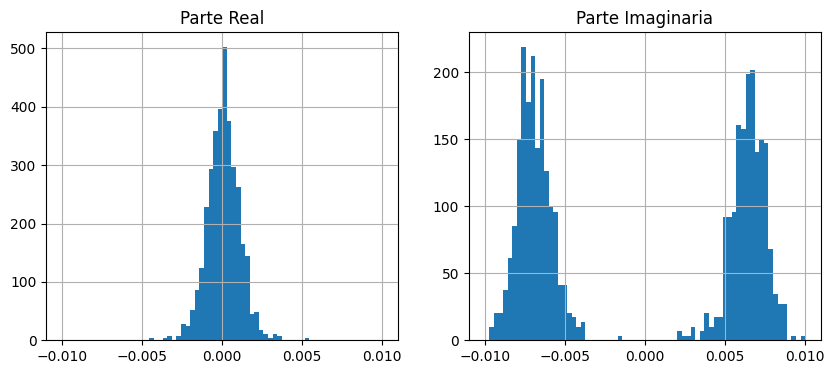

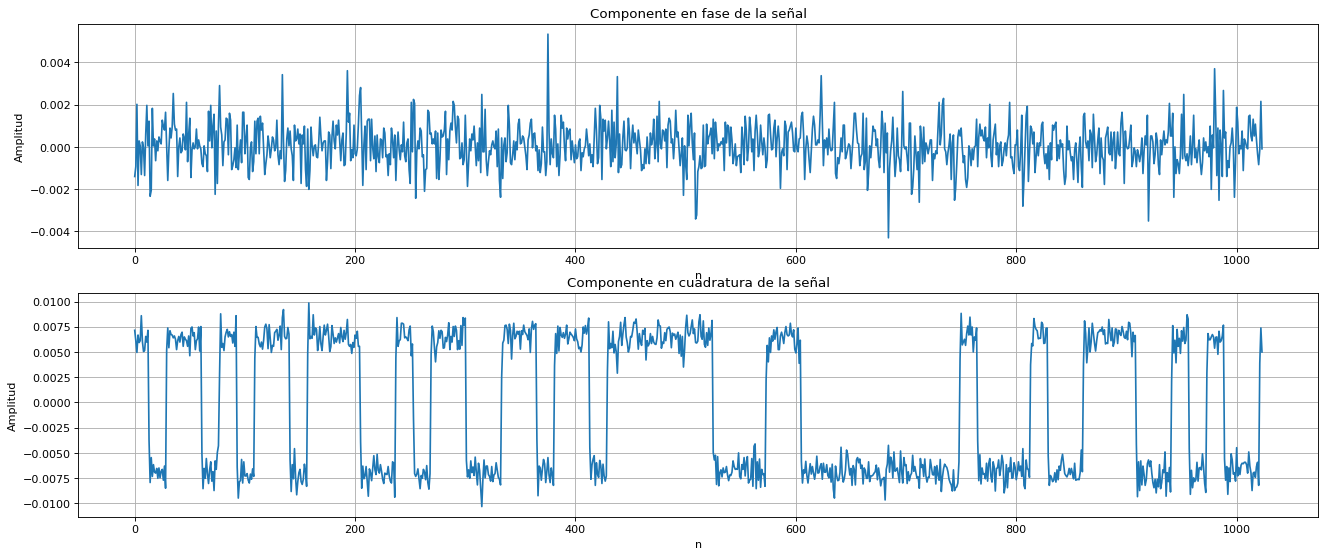

In [10]:
rxNormalizada = rxSignal/np.var(rxSignal)

histograma(rxNormalizada,rango = (-0.01,0.01))
plotSignal(rxNormalizada[0:1400])
plt.show()

3. 
+ Se repite lo anterior, pero aumentando la potencia de la señal

    No se notan cambios perceptibles en la señal ó el histograma (Sin tener en cuenta que las muestras son diferentes, pero esto es así porque para tener en cuenta el aumento de potencia se tuvo que tomar una muestra nueva de la señal)

In [11]:
cleanBuffer();
TxAtten = -70
rxSignal = sdr.rx()
rxNormalizada = rxSignal/np.var(rxSignal)

# plotSignal(rxNormalizada[0:400])

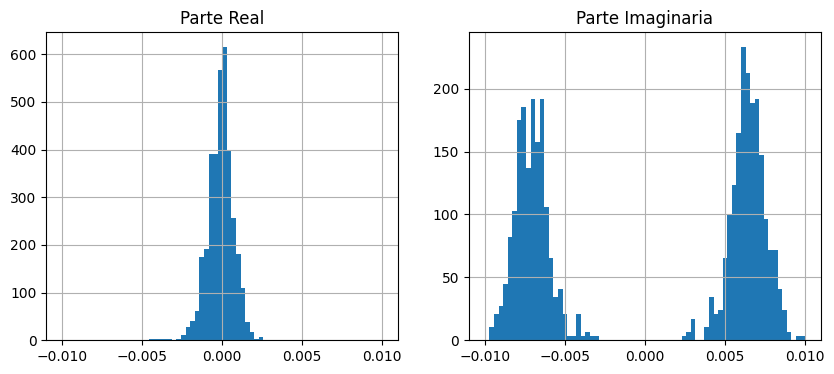

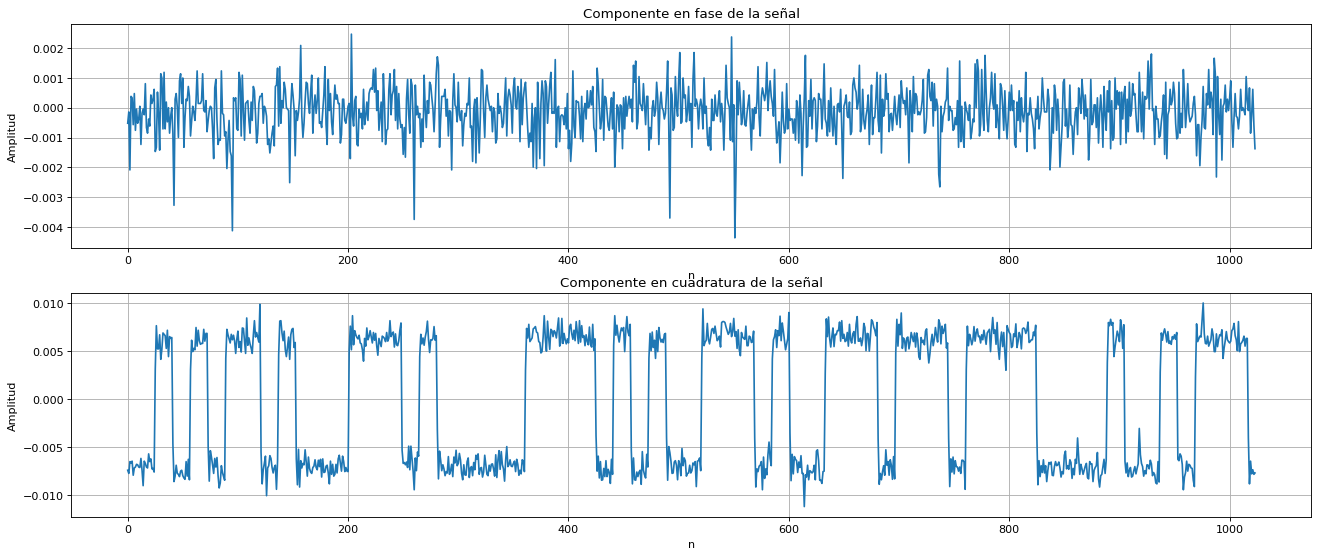

In [15]:
histograma(rxNormalizada,rango=(-0.01,0.01))
plotSignal(rxNormalizada[0:1400])
plt.show()

4. 
Definiendo Ref = 0.3

In [16]:
sdr.tx_destroy_buffer()
sdr.rx_destroy_buffer()
TxAtten = -79
txSignal = creartxSignal(0.3)
sdr.tx(txSignal*(2**15-1))
rxSignal = sdr.rx()



rxNormalizada = rxSignal/np.var(rxSignal)

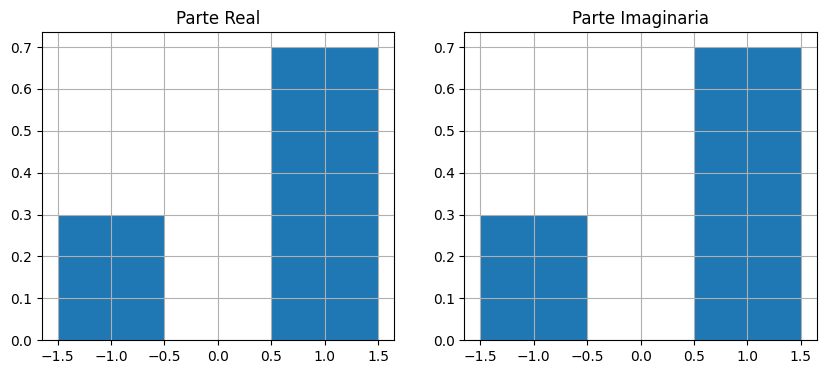

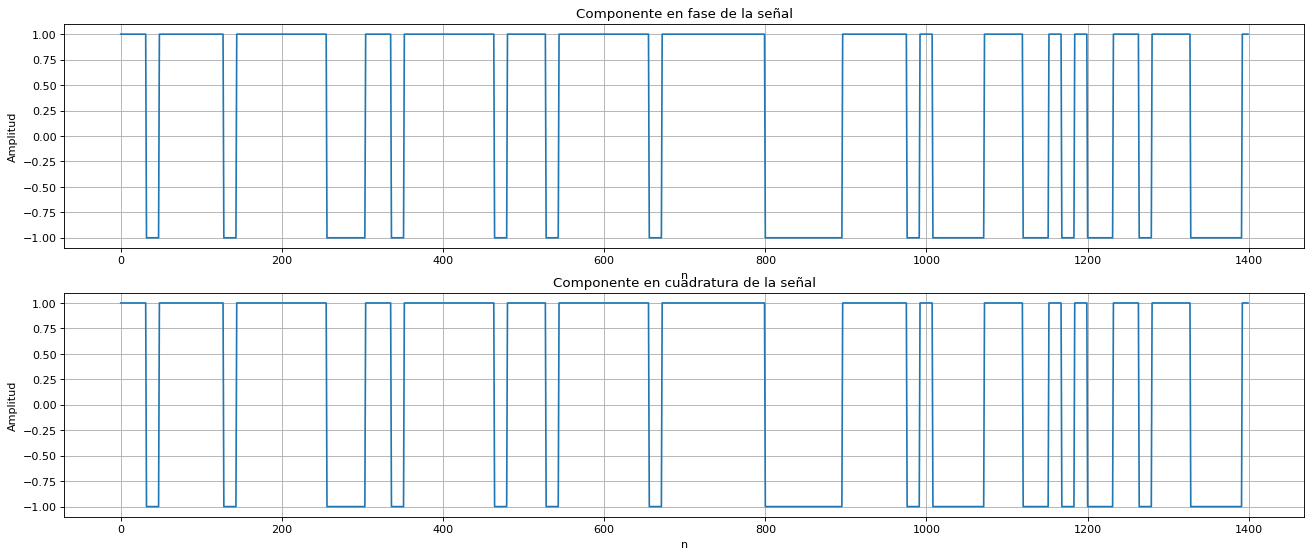

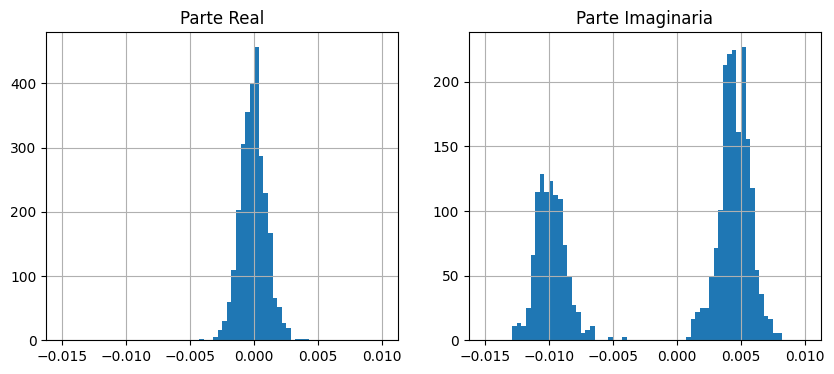

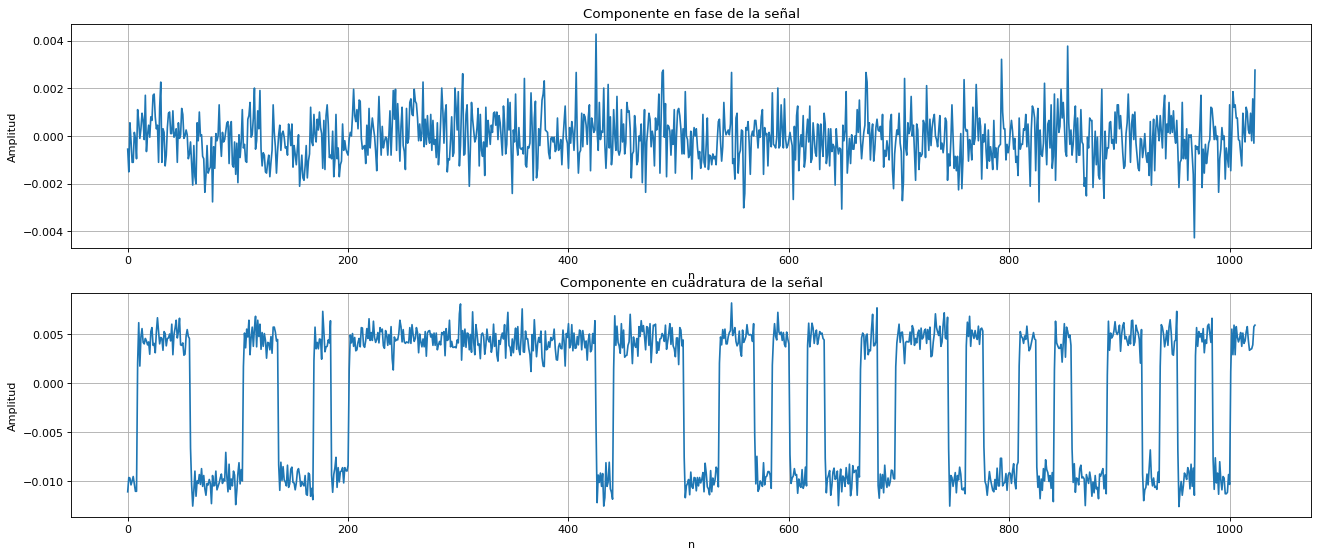

In [18]:
histograma(txSignal, 3, (-1.5,1.5))
plotSignal(txSignal[0:1400])

histograma(rxNormalizada,rango = (-0.015,0.01))
plotSignal(rxNormalizada[0:1400])

plt.show()

In [19]:
# Disminuyendo la potencia
cleanBuffer();
TxAtten = -70
rxSignal = sdr.rx()
rxNormalizada = rxSignal/np.var(rxSignal)

# plotSignal(rxNormalizada[0:400])

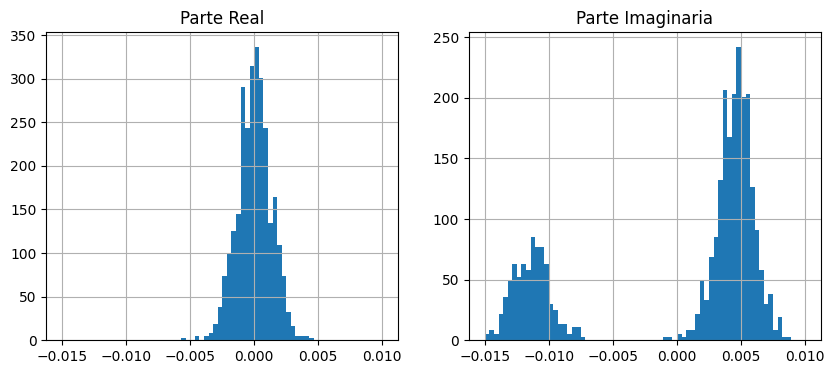

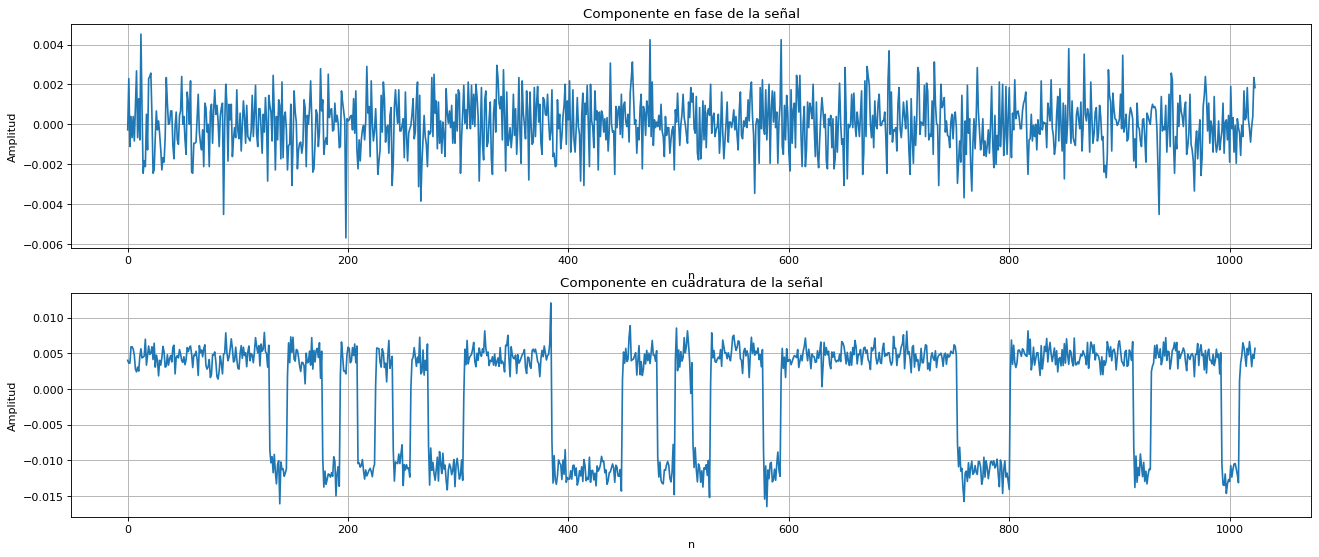

In [21]:
histograma(rxNormalizada,rango=(-0.015,0.01))
plotSignal(rxNormalizada[0:1400])
plt.show()

5. 
+ Se modifica el código para que las hipótesis enviada sea tal que $H \in \{ -1,-0.3333,+0.3333,+1\}$ con probabilidad uniforme
+ Luego se grafica el histograma de la señal recibida

    No se distingue ningún cambio con las señales anteriores, a pesar de que ahora los valores de hipótesis son diferentes de -1 y 1

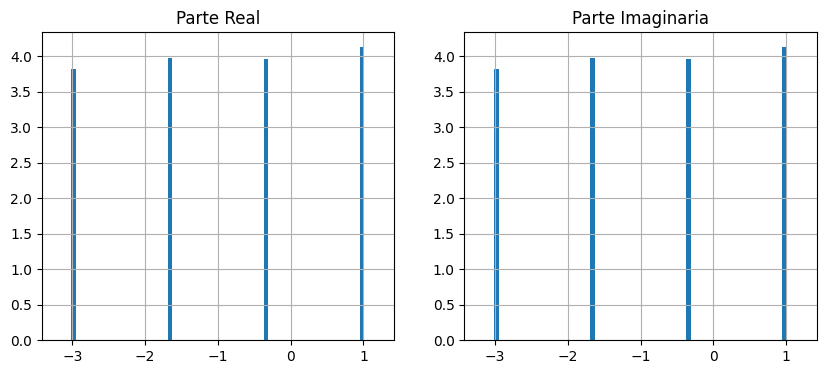

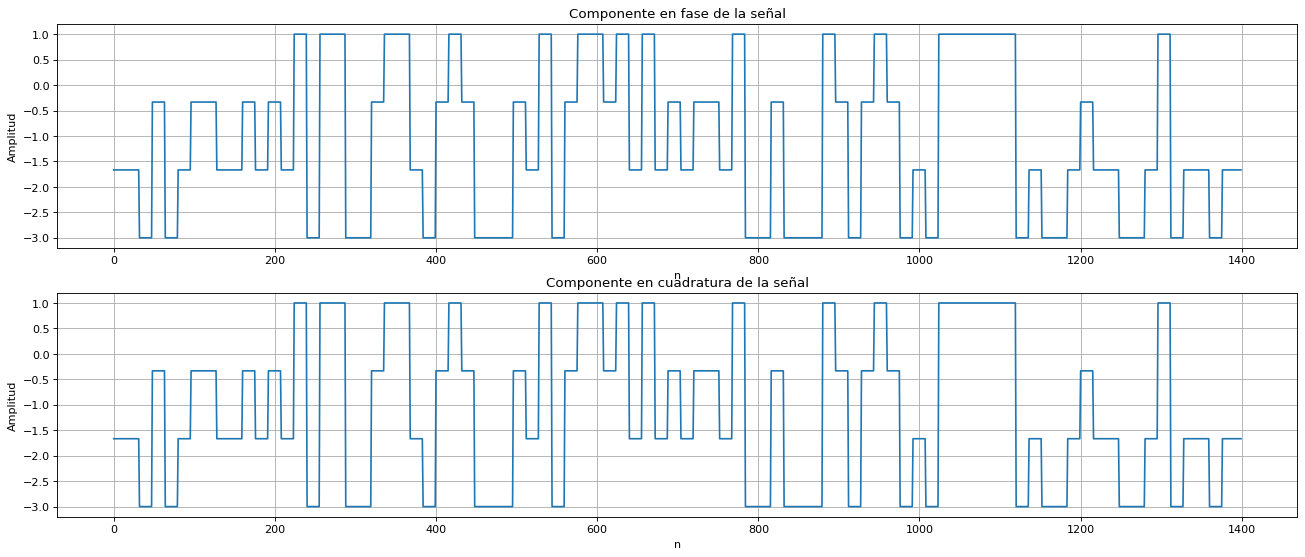

In [28]:
z = np.random.randint(1,101,nSamples)

x = []
for n in range(len(z)):
    if( z[n] < 25 ):
        x.append(-1)
    elif( z[n] < 50 ):
        x.append(-0.3333)
    elif( z[n] < 75):
        x.append(0.3333)
    else:
        x.append(1)


txSignal = (2*np.repeat(x,2**4)-1)+1j*(2*np.repeat(x,2**4)-1)

# Re-configuración de algunos parámetros del SDR

sdr.tx_destroy_buffer()
sdr.rx_destroy_buffer()
sdr.tx_cyclic_buffer = tx_cyclic_buffer;
TxAtten = -70
# RxBufferSize = len(txSignal) 
# cleanBuffer()

# Envío de la señal
sdr.tx(txSignal*(2**15-1))

# Recepción de la señal
rxSignal = sdr.rx()

# Se grafica la señal enviada
histograma(txSignal,rango = (-3.2,1.2))
plotSignal(txSignal[0:1400])

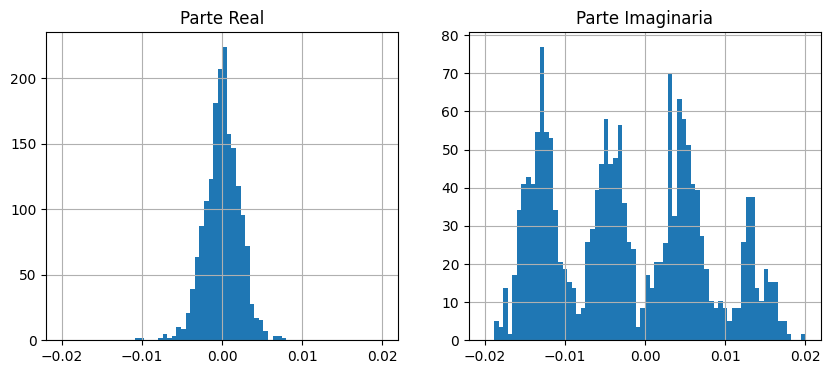

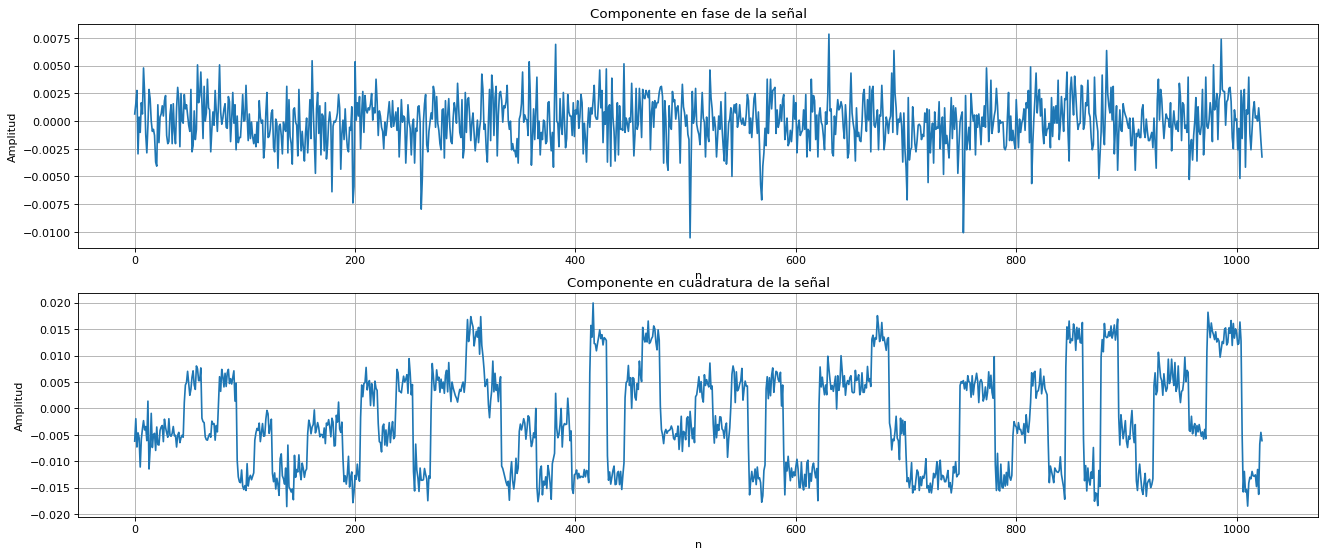

In [29]:
rxNormalizada = rxSignal/np.var(rxSignal)

histograma(rxNormalizada,rango = (-.02,.02))
plotSignal(rxNormalizada[0:1400])
plt.show()

### Ejecutar el Final

In [ ]:
### Since it is not possible to turn off Tx, it is configured to transmit at low power and on a different frequency than Rx.
sdr.tx_destroy_buffer()
sdr.rx_destroy_buffer()
sdr.tx_hardwaregain_chan0 = -89 
sdr.tx_lo                 = int(2400e6)
sdr.rx_lo                 = int(950e6)
sdr.tx(np.zeros(2048))

### Destroy radio object
del(sdr)